<a href="https://colab.research.google.com/github/juhumkwon/YOLO/blob/main/yolov11(COCO%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.5/913.5 kB 13.6 MB/s eta 0:00:00


Saving 여우.jpg to 여우.jpg

0: 416x640 1 dog, 917.3ms
Speed: 6.4ms preprocess, 917.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted 

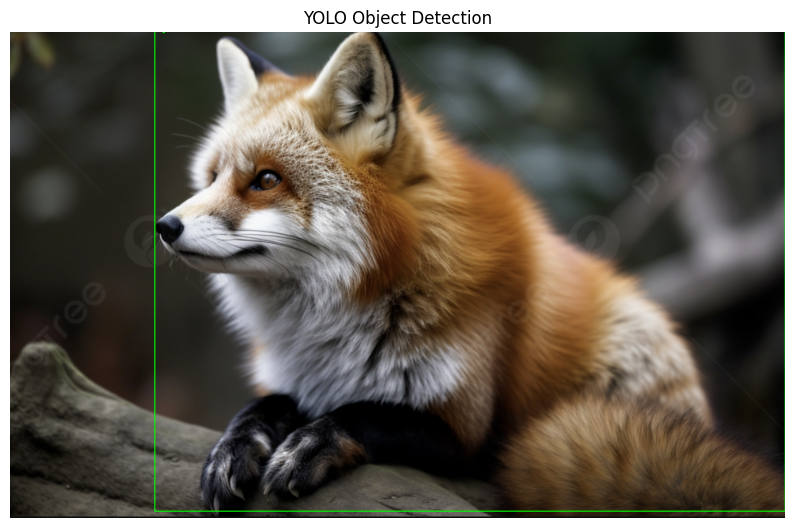

True

In [5]:
from IPython.display import display
import numpy as np
from google.colab import files
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import io

# YOLO 모델 로드 (사전 학습된 YOLO11m 가중치 사용)
model = YOLO('yolo11m.pt')

# 이미지 업로드 및 처리
image_path = files.upload()
filename, content = next(iter(image_path.items()))
image = cv2.imdecode(np.frombuffer(content, np.uint8), cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # OpenCV 이미지를 RGB로 변환

# 모델 추론
results = model.predict(source=image, conf=0.5, save=False)
print(model.names)

# 결과 시각화
for result in results:
    for box in result.boxes:
        # 바운딩 박스 좌표 및 클래스 정보 추출
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = box.conf[0]
        class_name = model.names[int(box.cls[0])]

        # 바운딩 박스 및 클래스 표시
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        label = f"{class_name} {conf:.2f}"
        cv2.putText(image, label, (x1, max(y1 - 10, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# 결과 이미지 시각화
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.title("YOLO Object Detection")
plt.show()

# 결과 저장 (선택 사항)
cv2.imwrite('output_image.jpg', cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
